<a href="https://colab.research.google.com/github/abibroad/Abi/blob/master/Abi_Stringency_Index_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID-19 Stringency Index 

The Oxford Covid-19 Government Response Tracker (OxCGRT) collects systematic information on which governments have taken which measures, and when. This can help decision-makers and citizens understand governmental responses in a consistent way, aiding efforts to fight the pandemic. The OxCGRT systematically collects information on several different common policy responses governments have taken, records these policies on a scale to reflect the extent of government action, and aggregates these scores into a suite of policy indices.

In [30]:
import pandas as pd
#reading in the csv file for the stringency index
df = pd.read_csv('/OxCGRT_latest_hackathon.csv')

In [31]:
df.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.tail()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
42915,Pitcairn Islands,PCN,20200815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
42916,Pitcairn Islands,PCN,20200816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
42917,Pitcairn Islands,PCN,20200817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
42918,Pitcairn Islands,PCN,20200818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
42919,Pitcairn Islands,PCN,20200819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN


**Stringency Index in the UK**





In [33]:
#filtering and creating a new data frame
df_uk = df[df['CountryName'] == "United Kingdom"]
df_uk.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
13688,United Kingdom,GBR,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13689,United Kingdom,GBR,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13690,United Kingdom,GBR,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13691,United Kingdom,GBR,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13692,United Kingdom,GBR,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [35]:
#converting the Date column from a string to a date format
from datetime import datetime
df_uk['Date'] = pd.to_datetime(df['Date'].astype(str))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Time Series of Stringency and Government Response Index**

The data from the 17 indicators is aggregated into a set of four common indices, reporting a number between 1 and 100 to reflect the level of government action on the topics in question:

an overall government response index (which records how the response of governments has varied over all indicators in the database, becoming stronger or weaker over the course of the outbreak);
a containment and health index (which combines ‘lockdown’ restrictions and closures with measures such as testing policy and contact tracing, short term investment in healthcare, as well investments in vaccine)
an economic support index (which records measures such as income support and debt relief)
as well as the original stringency index (which records the strictness of ‘lockdown style’ policies that primarily restrict people’s behaviour).

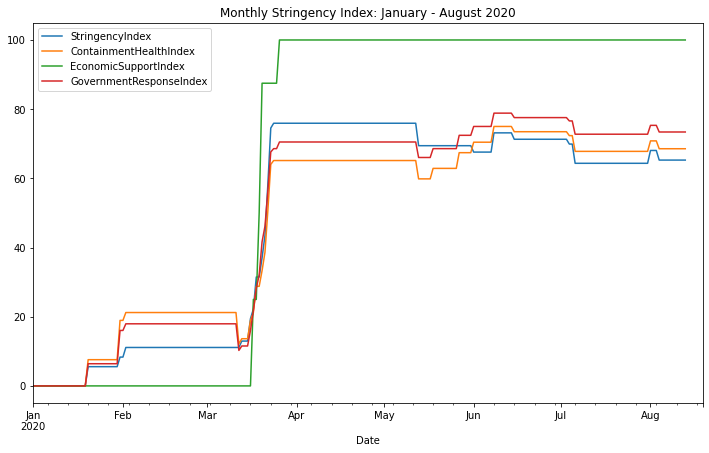

In [36]:
df_uk.plot.line(x='Date', y=['StringencyIndex', 'ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex'], figsize=(12,7), title = 'Monthly Stringency Index: January - August 2020')

So we can see that the Economic Support Index is the highest index. The Stringency Index is above the overall Government Response Index and the Containment Health Index is the lowest.

In [37]:
#adding in a column for the week
df_uk['week'] = df_uk.Date.dt.isocalendar().week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


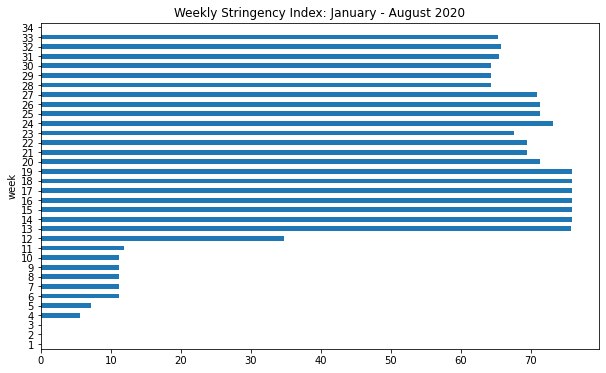

In [38]:
#showing the stringency index for each week
from statistics import mean
df_uk2 = df_uk.groupby('week')['StringencyIndex'].mean()
df_uk2.plot(kind='barh', figsize=(10, 6), title = 'Weekly Stringency Index: January - August 2020')

In [39]:
#adding in a month column
df_uk['month'] = df_uk.Date.dt.month


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


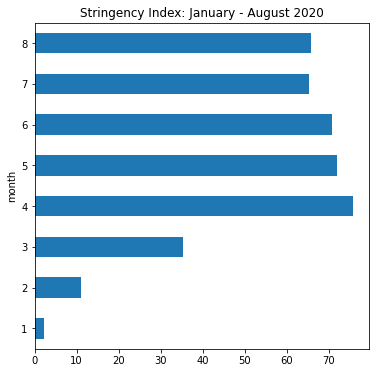

In [40]:
from statistics import mean

df_uk_si = df_uk.groupby('month')['StringencyIndex'].mean()
df_uk_si.plot(kind='barh', figsize=(6, 6), title = "Stringency Index: January - August 2020")

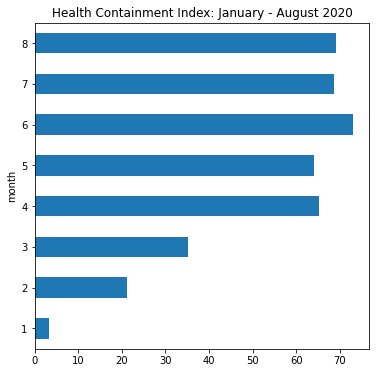

In [41]:
df_uk_hi = df_uk.groupby('month')['ContainmentHealthIndex'].mean()
df_uk_hi.plot(kind='barh', figsize=(6, 6), title = "Health Containment Index: January - August 2020")

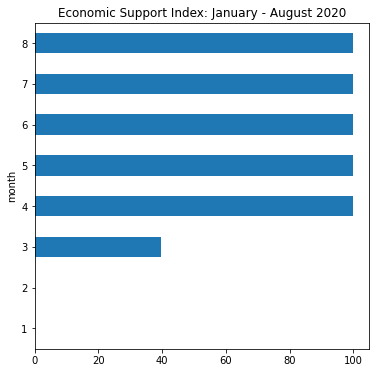

In [42]:
df_uk_hi = df_uk.groupby('month')['EconomicSupportIndex'].mean()
df_uk_hi.plot(kind='barh', figsize=(6, 6), title = "Economic Support Index: January - August 2020")

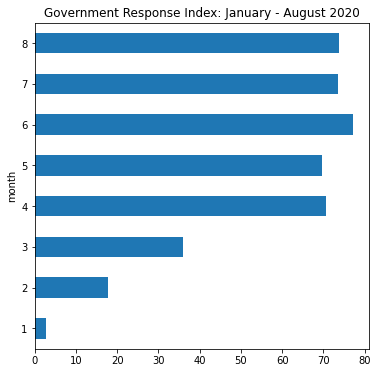

In [43]:
df_uk_hi = df_uk.groupby('month')['GovernmentResponseIndex'].mean()
df_uk_hi.plot(kind='barh', figsize=(6, 6), title = "Government Response Index: January - August 2020")

**Policy indicators**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


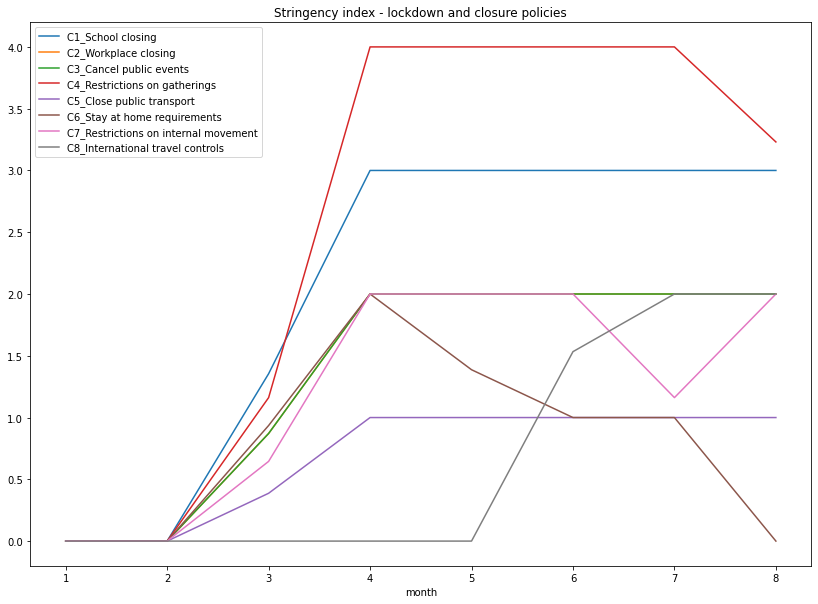

In [44]:
#Setting the month as the index and selecting the c columns relating to the policy indicators in relation to containment and closure policies
df_uk4 = df_uk.set_index('month')
df_uk5 = df_uk4[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements',  'C7_Restrictions on internal movement', 'C8_International travel controls'
            ]]
df_uk6=df_uk5.groupby('month')['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements',  'C7_Restrictions on internal movement', 'C8_International travel controls'].mean()
df_uk6.plot.line(figsize=(14,10),title = "Stringency index - lockdown and closure policies")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


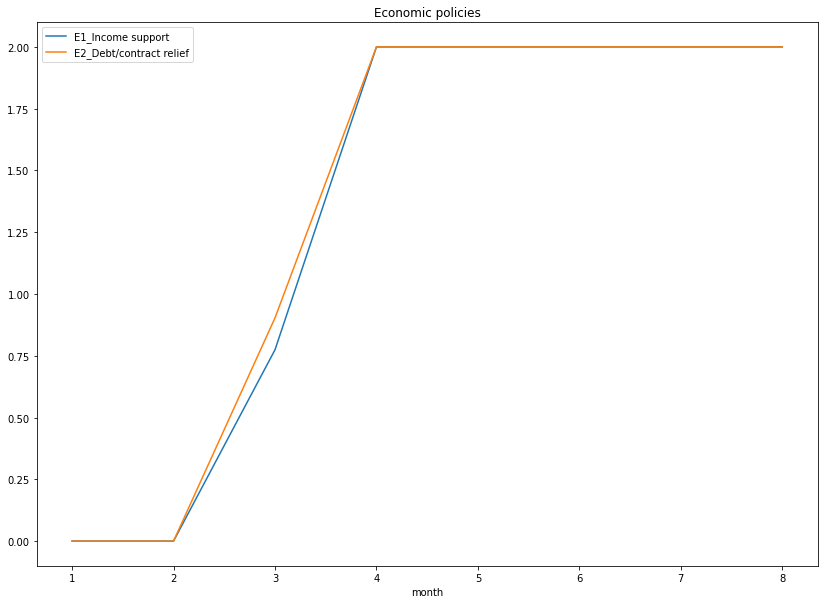

In [45]:
#Setting the month as the index and selecting the e columns relating to the policy indicators in relation to the economy
df_uke1 = df_uk.set_index('month')
df_uke2 = df_uke1[['E1_Income support','E2_Debt/contract relief']]
df_uke3=df_uke2.groupby('month')['E1_Income support','E2_Debt/contract relief'].mean()
df_uke3.plot.line(figsize=(14,10),title = "Economic policies")

#note - I had to remove E3_Fiscal measures and E4 international support due to data errors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


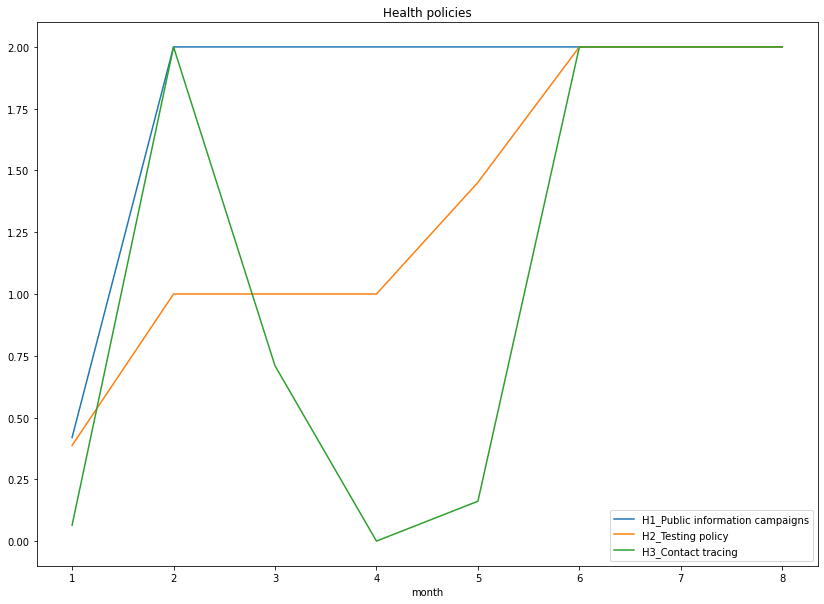

In [46]:
#Setting the month as the index and selecting the h columns relating to the policy indicators in relation to the lockdown restrictions with health related policies including testing
df_ukh1 = df_uk.set_index('month')
df_ukh2 = df_ukh1[['H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing']]
df_ukh3=df_ukh2.groupby('month')['H1_Public information campaigns',
        'H2_Testing policy', 'H3_Contact tracing'].mean()
df_ukh3.plot.line(figsize=(14,10),title = "Health policies")

#note - I had to remove H4 Emergency investment in healthcare and H5 Investment in vaccines due to data errors